# Assignment 6: BERT
_Word Representations and Language Models (WS 24/25)_

Group Members: Ludmila Bajuk, Buket Sak, Alexander Weyhe
***

<div style="position:relative;padding:.75rem 1.25rem;margin-bottom:1rem;border:1px solid transparent;border-radius:.25rem;background-color:#FFF2CC;border-color:#D6B656;color:#856404">
<b>How to Submit the Assignment</b>

Please work on this assignment in groups of two or three. Make sure to add your names to this files header. After completion, share this assignment with me (<b>Julian Schelb - <a target="blank" href="https://www.kaggle.com/julianschelb">https://www.kaggle.com/julianschelb</a></b>) due Wednesday, 11th December, 12:00. Use the upper-right share button as instructed in the tutorial. In ILIAS, submit this notebook as response to Assignment 06. You can download this notebook using the "Download Notebook" option in the "File" menu.
</div>

## Task 1: Extracting Embeddings From BERT

In the first task, you will experiment with subword tokenization and using BERT (Bidirectional Encoder Representations from Transformers) to extract contextualized token embeddings.

In [1]:
#!pip install transformers
from transformers import BertModel, BertTokenizerFast
from tqdm.notebook import tqdm
import transformers
import torch
import json

<div style="position:relative;padding:.75rem 1.25rem;margin-bottom:1rem;border:1px solid transparent;border-radius:.25rem;background-color:#dae8fc;border-color:#6c8ebf;color:#0c5460">
<b>Step 1: Load Model and Tokenizer</b> 
</div>

Please load the *BERTModel* and *BertTokenizer* with pretrained weights from the **HuggingFace API**: https://huggingface.co/bert-base-uncased. Here, you can read more about how to use the Transformers package to load and use BERT: https://huggingface.co/docs/transformers/model_doc/bert.

In [2]:
# Define tokenizer 
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")
# Download model with pretrained weights 
model = BertModel.from_pretrained("bert-base-uncased", output_hidden_states=True)
# Set model to evaluation mode
model.eval()

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

<div style="position:relative;padding:.75rem 1.25rem;margin-bottom:1rem;border:1px solid transparent;border-radius:.25rem;background-color:#dae8fc;border-color:#6c8ebf;color:#0c5460">
<b>Step 2: Experiment with Tokenization</b> 
</div>

To process an input sentence through a model like BERT, it's necessary to segment the sentence into individual tokens and convert them into a list of integers representing their respective token IDs in the vocabulary. To gain a more in-depth understanding of BERT's tokenizer functionality, please implement the following steps:

1. Print the list of five special tokens utilized by [BERT's tokenizer](https://huggingface.co/docs/transformers/model_doc/bert#transformers.BertTokenizer), ensuring you comprehend their purpose.
2. Employ the tokenizer to encode the word `king` and display the corresponding token IDs.
3. Next, use the tokenizer to encode the sentence `A kingfisher was spotted near the lake.`. Convert these token IDs back to their respective tokens and print the outcome. Provide a brief description of your observations.

In [3]:
# Print the list of special tokens
special_tokens = {
    "cls_token": tokenizer.cls_token,
    "sep_token": tokenizer.sep_token,
    "pad_token": tokenizer.pad_token,
    "unk_token": tokenizer.unk_token,
    "mask_token": tokenizer.mask_token,
}
print("Special Tokens Used by BERT's Tokenizer:")
for name, token in special_tokens.items():
    print(f"{name}: {token}")

Special Tokens Used by BERT's Tokenizer:
cls_token: [CLS]
sep_token: [SEP]
pad_token: [PAD]
unk_token: [UNK]
mask_token: [MASK]


In [4]:
# Encode word and print input ids
word = "king"
encoded_word = tokenizer.encode(word)#, add_special_tokens=False)  # Exclude special tokens
print(f"\nToken IDs for the word '{word}': {encoded_word}")


Token IDs for the word 'king': [101, 2332, 102]


101 is [CLS],

2332 is the word "king",

102 is [SEP].

We could also exclude them.

In [5]:
# Print tokenized sentence
test_sentence = "A kingfisher was spotted near the lake."
encoded_sentence = tokenizer.encode(test_sentence)
decoded_tokens = tokenizer.convert_ids_to_tokens(encoded_sentence)
print(f"\nOriginal Sentence: {test_sentence}")
print(f"Encoded Token IDs: {encoded_sentence}")
print(f"Decoded Tokens: {decoded_tokens}")


Original Sentence: A kingfisher was spotted near the lake.
Encoded Token IDs: [101, 1037, 2332, 7529, 2121, 2001, 7282, 2379, 1996, 2697, 1012, 102]
Decoded Tokens: ['[CLS]', 'a', 'king', '##fish', '##er', 'was', 'spotted', 'near', 'the', 'lake', '.', '[SEP]']


**Your observations:**

-The encoded token IDs correspond to each token's position in BERT's vocabulary.

-[CLS] and [SEP] represents the start and the end of the input sentence.

-The word "kingfisher" is not a word that is in the vocabulary, so it is splitted into subword tokens.

<div style="position:relative;padding:.75rem 1.25rem;margin-bottom:1rem;border:1px solid transparent;border-radius:.25rem;background-color:#dae8fc;border-color:#6c8ebf;color:#0c5460">
<b>Step 3: Extract Embedding</b> 
</div>

Now use the model to return a word embedding for `King`: Encode the word, convert it into a tensor, and take the *last_hidden_state* as word representation. Also calculate the word embedding for `King` by averaging hidden states of BERT's last four layers. A detailed introduction on how to work with BERT embeddings from different layers is provided at https://mccormickml.com/2019/05/14/BERT-word-embeddings-tutorial/.

In [6]:
# Extract exemplary embedding of "king"
encoded_word = tokenizer.encode("king", return_tensors="pt")
print("Token IDs:", encoded_word.tolist())  # Print token IDs for understanding

token_ids = tokenizer.convert_ids_to_tokens(encoded_word[0])
word_position = token_ids.index(word)  # Automatically find the position of "king"

# Pass pre-preprocessed data to BERT and get output (use "last_hidden_state as representations for single words")
with torch.no_grad():  # Disable gradient computation
    outputs = model(encoded_word)
    last_hidden_state = outputs.last_hidden_state  
    hidden_states = outputs.hidden_states  # All hidden states from all layers
# We get three vectors: first and third vector representes start/stop token. 
# Middle vector represents word


Token IDs: [[101, 2332, 102]]


In [7]:
# Print averaged embedding for word based on last four layers
word_embedding_last_layer = last_hidden_state[0, word_position, :]
#Calculate the averaged embedding from the last four layers
last_four_layers = torch.stack(hidden_states[-4:])  # Stack the last four layers: shape [4, batch_size, seq_len, hidden_size]
averaged_embedding = torch.mean(last_four_layers[:, 0, word_position, :], dim=0)  # Average across 4 layers

print(f"Word embedding for '{word}' (last hidden state): {word_embedding_last_layer.shape}")
print(f"Word embedding for '{word}' (averaged last four layers): {averaged_embedding.shape}")

Word embedding for 'king' (last hidden state): torch.Size([768])
Word embedding for 'king' (averaged last four layers): torch.Size([768])


## Task 2: Ambiguous Words in the English Language

Now that you're familiar with using BERT for generating token embeddings, let's explore how well BERT handles ambiguous words. Ambiguity in language arises when a single word has multiple interpretations depending on the context. For instance, the word 'bat' can refer to an animal or a sports equipment used in games like cricket and baseball. Similarly, 'bank' might denote a financial institution or the side of a river. 

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import gensim
import json
import re


In [9]:
# Read article data
with open("../input/relevant_sent.json","rb") as d:
    sentences = json.load(d)

<div style="position:relative;padding:.75rem 1.25rem;margin-bottom:1rem;border:1px solid transparent;border-radius:.25rem;background-color:#dae8fc;border-color:#6c8ebf;color:#0c5460">
<b>Step 1: Find Mentions of Run</b> 
</div>

The word `run` is considered to be the most ambiguous word in the 
English language, so it is a good test to see how well BERT handles 
ambiguity. Extract 200 sentences containing the word "run" from the news 
corpus by implementing the following steps:

* First, look up the token ID of "run". 
* Subsequently, iterate over the sentences in the corpus to identify sentences containing that token ID.


In [10]:
# Extract sentences from the 'text' field
sentences = [entry['text'] for entry in sentences if 'text' in entry and isinstance(entry['text'], str) and entry['text'].strip()]

In [11]:
# Get the vocabulary ID of the token
token_id = tokenizer.convert_tokens_to_ids("run")
print(f"Token ID for 'run': {token_id}")

Token ID for 'run': 2448


In [12]:
# Extract 200 sentences containing the word 'run'
def extract_sentences(corpus, target_token_id, max_sentences=200):
    run_sent = []
    
    for sentence in corpus:
        # Tokenize the sentence
        token_ids = tokenizer.encode(sentence)
        
        # Check if the target token ID is in the sentence
        if target_token_id in token_ids:
            run_sent.append(sentence)
        
        # Stops when we have required number of sentences
        if len(run_sent) >= max_sentences:
            break
    
    return run_sent

run_sent = extract_sentences(sentences, token_id, max_sentences=200)

In [13]:
# Print the first five sentences
print(f"First 5 sentences containing 'run':")
for i, sentence in enumerate(run_sent[:5], start=1):  # Slicing to get the first 5 sentences
    print(f"{i}: {sentence}")

First 5 sentences containing 'run':
1: But rather than accept that municipal housing, run by councils or housing associations, is a necessary and prudent investment that prevents far more costly homelessness, the government has focused on private home ownership that only benefits the already comfortable.
2: In the long term, selling off social housing at a heavy discount and over-inflating prices on new-build properties while helping people take a step on to a rung of an increasingly precarious housing ladder hurts more people than it helps.
3: But politics has been staging a festive diversion for some months now, and the pantomime playing out on the opposition benches looks set to run throughout the coming year.
4: Too many borrowed garments, or just the end of a long and successful run?
5: During the run-up to Tony Blair’s first Christmas as prime minister, in December 1997, my former boss Paddy Ashdown warned that the public was “simply bewildered” to see Labour sweep to power and t

<div style="position:relative;padding:.75rem 1.25rem;margin-bottom:1rem;border:1px solid transparent;border-radius:.25rem;background-color:#dae8fc;border-color:#6c8ebf;color:#0c5460">
<b>Step 2: Extract and Visualize Token Embeddings</b> 
</div>

Use BERT to create embeddings for all words in these 200 
sentences, then plot a 2-dimensional PCA projection in which you 
highlight embeddings for "run" in a different color.


In [14]:
# Get embeddings and token ids for all words in filtered sentences
def get_embeddings(sentences, target_word):
    embeddings = []
    labels = []
    
    for sentence in sentences:
        inputs = tokenizer(sentence, return_tensors='pt')
        with torch.no_grad():
            outputs = model(**inputs)
        
        # Get hidden states from the last four layers
        hidden_states = outputs.hidden_states[-4:]
        # Stack and average the hidden states
        avg_hidden_states = torch.mean(torch.stack(hidden_states), dim=0)
        
        # Decode tokens to identify positions of words
        tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
        
        for i, token in enumerate(tokens):
            # Skip special tokens
            if token in ['[CLS]', '[SEP]']:
                continue
            # Aggregate subword tokens
            if token.startswith('##'):
                embeddings[-1] += avg_hidden_states[0, i, :].numpy()
            else:
                embeddings.append(avg_hidden_states[0, i, :].numpy())
                labels.append(token)  # Add the actual token to labels
    
    return np.array(embeddings), labels

embeddings, labels = get_embeddings(run_sent, 'run')

In [15]:
# Apply PCA
# Plotting function that labels tokens as "run" or "other"
def plot_embeddings(embeddings, labels):
    # Replace all non-"run" tokens with "other" for plotting
    plot_labels = ["run" if label == "run" else "other" for label in labels]
    
    # Apply PCA to reduce dimensions to 2
    pca = PCA(n_components=2)
    embeddings_2d = pca.fit_transform(embeddings)

    # Create the scatter plot
    plt.figure(figsize=(10, 8))
    for label in set(plot_labels):
        indices = [i for i, l in enumerate(plot_labels) if l == label]
        plt.scatter(embeddings_2d[indices, 0], embeddings_2d[indices, 1], label=label, alpha=0.7)
    
    plt.legend()
    plt.title("2D PCA of BERT Embeddings")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()


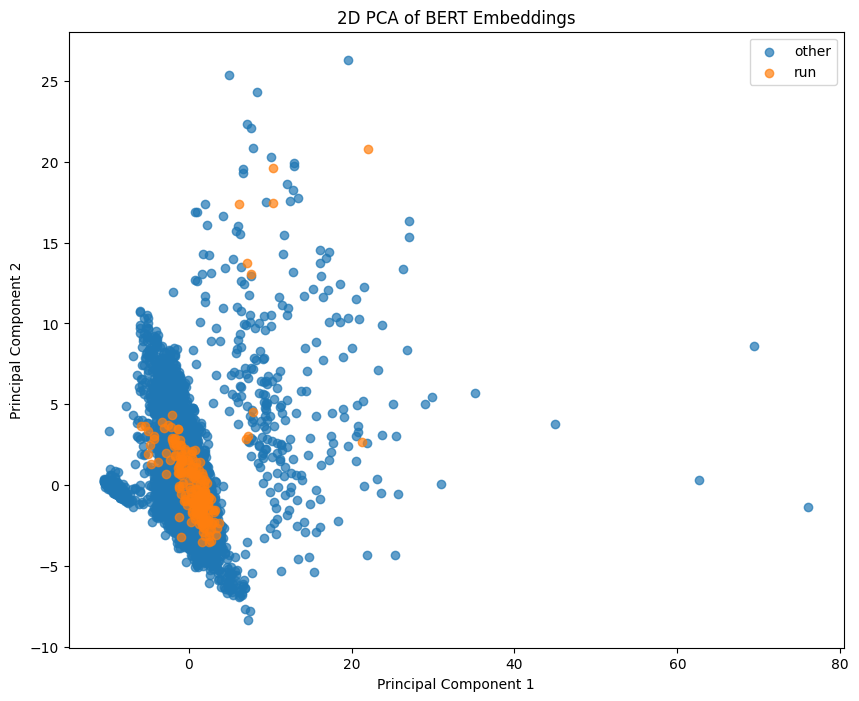

In [16]:
# Create scatter plot with projected embeddings
plot_embeddings(embeddings, labels)

<div style="position:relative;padding:.75rem 1.25rem;margin-bottom:1rem;border:1px solid transparent;border-radius:.25rem;background-color:#dae8fc;border-color:#6c8ebf;color:#0c5460">
<b>Step 3: Identify Different Meanings of "Run"</b> 
</div>

Utilize the plot of projected embeddings and nearest neighbor search in the embedding space to pinpoint 10 distinct meanings of 'run' through association. For the first 10 instances of 'run,' identify the most similar words by comparing their embeddings using cosine similarity to all other words in the 200 sentences. Then, list the 5 words that are most similar for each of the 10 mentions of "run". Can you identify distinct meanings?

In [17]:
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
# List 5 most similar words for the first 10 mentions of "run"
def nearest_neighbors(target_embedding, embeddings, tokens, top_k=5, exclude_special=True, exclude_stopwords=True):
    similarities = cosine_similarity(target_embedding.reshape(1, -1), embeddings).flatten()
    nearest_indices = np.argsort(similarities)[::-1]  # Sort by similarity
    
    # Optionally exclude special tokens
    if exclude_special:
        nearest_indices = [i for i in nearest_indices if tokens[i] not in ['[CLS]', '[SEP]']]
    if exclude_stopwords:
        nearest_indices = [i for i in nearest_indices if tokens[i] not in stop_words]
    # Exclude the target word itself ("run") and get top-k neighbors
    nearest_indices = [i for i in nearest_indices if tokens[i] != "run"][:top_k]
    
    return [(tokens[i], similarities[i]) for i in nearest_indices]

# Identify all instances of "run"
run_indices = [i for i, label in enumerate(labels) if label == "run"]

# Store results for the first 10 instances of "run"
distinct_meanings = {}

for idx in run_indices[:10]:  # First 10 instances of "run"
    target_embedding = embeddings[idx]  # Get the embedding for the current "run"
    neighbors = nearest_neighbors(target_embedding, embeddings, labels, top_k=5, exclude_stopwords=True)
    distinct_meanings[f"Run Instance {idx + 1}"] = neighbors

# Display results
for run_instance, neighbors in distinct_meanings.items():
    print(f"\n{run_instance}:")
    for word, similarity in neighbors:
        print(f"  {word}: {similarity:.4f}")



Run Instance 9:
  owned: 0.6036
  managed: 0.5663
  ownership: 0.5653
  owned: 0.5650
  structured: 0.5485

Run Instance 76:
  ladder: 0.5645
  cliff: 0.5451
  step: 0.5307
  ladder: 0.5119
  pre: 0.4970

Run Instance 115:
  start: 0.6131
  occur: 0.5912
  throughout: 0.5895
  staging: 0.5866
  push: 0.5816

Run Instance 135:
  successful: 0.6621
  long: 0.5541
  operation: 0.4880
  diversion: 0.4596
  narrative: 0.4582

Run Instance 139:
  eve: 0.5496
  -: 0.5254
  -: 0.5163
  -: 0.5104
  -: 0.4896

Run Instance 201:
  stir: 0.6892
  engage: 0.6428
  operation: 0.6382
  send: 0.6320
  around: 0.6306

Run Instance 253:
  term: 0.7336
  term: 0.6966
  long: 0.5100
  long: 0.4643
  long: 0.4362

Run Instance 274:
  help: 0.6590
  attract: 0.5996
  keeping: 0.5963
  win: 0.5888
  building: 0.5789

Run Instance 311:
  may: 0.6025
  luck: 0.5349
  turn: 0.4955
  turn: 0.4833
  sink: 0.4387

Run Instance 386:
  long: 0.5482
  moved: 0.5024
  fallen: 0.4950
  reached: 0.4808
  luna: 0.4791


<div style="position:relative;padding:.75rem 1.25rem;margin-bottom:1rem;border:1px solid transparent;border-radius:.25rem;background-color:#dae8fc;border-color:#6c8ebf;color:#0c5460">
<b>Step 4: Comparison with Word2vec</b> 
</div>

"Repeat" the above in word2vec by computing embeddings from a pre-trained model of all words in the 200 sentences and plotting a 2-dimensional PCA projection. Discuss your results.

In [18]:
import gensim.downloader as api

# Load the 300-dimensional Google News Word2Vec model
model_word2vec = api.load("word2vec-google-news-300")

[=================================================-] 99.9% 1661.8/1662.8MB downloaded


In [19]:
# Get embeddings
def get_word2vec_embeddings(sentences, model):
    embeddings = []
    labels = []
    
    for sentence in sentences:
        for word in sentence.split():
            if word in model:
                embeddings.append(model[word])  # Get word embedding from Word2Vec model
                labels.append("run" if word == "run" else "other")  # Store the word as the label
    
    return np.array(embeddings), labels

# Example: Get embeddings for all words in 200 sentences
embeddings, labels = get_word2vec_embeddings(run_sent, model_word2vec)

In [20]:
# PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Print the first few rows of the reduced embeddings to verify
print(embeddings_2d[:5])

[[-0.25065124  0.22204691]
 [-0.05271155  0.39723372]
 [-0.25366914  0.0238624 ]
 [ 0.08780309  0.38870907]
 [-0.21528687  0.18607561]]


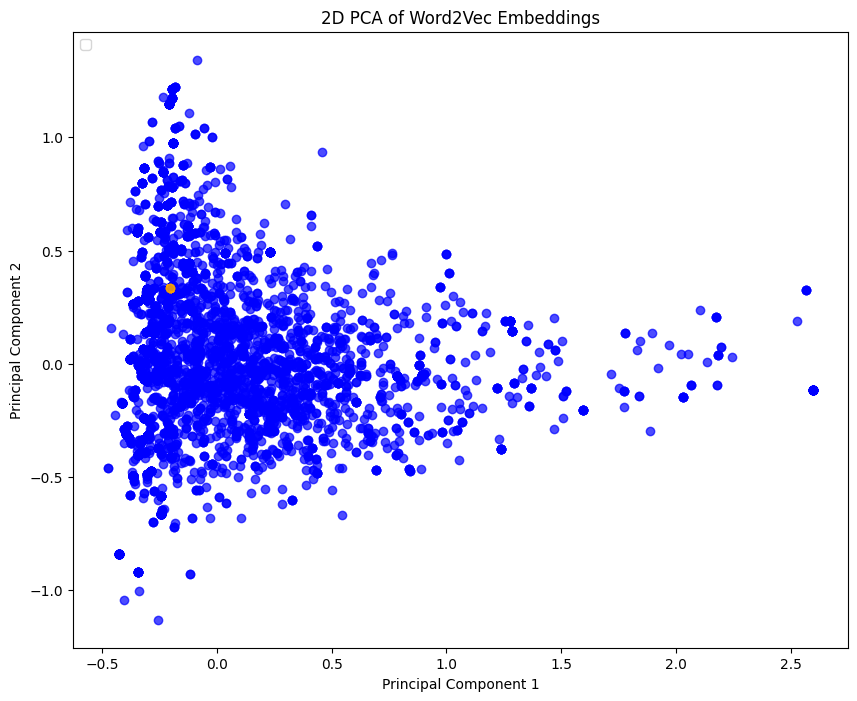

In [21]:
# Create scatter plot with projected embeddings
def plot_word2vec_embeddings(embeddings_2d, labels):
    plt.figure(figsize=(10, 8))
    for i in range(len(labels)):
        if labels[i] == "run":
            plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], color='orange', alpha=0.3)
        else:
            plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], color='blue', alpha=0.7)
    
    plt.legend(loc='upper left')
    plt.title("2D PCA of Word2Vec Embeddings")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()

# Plot the embeddings, marking "run" separately
plot_word2vec_embeddings(embeddings_2d, labels)

In [22]:
# Get five nearest neighbors
def nearest_neighbors_word2vec(target_word, model, top_k=5):
    neighbors = model.most_similar(target_word, topn=top_k)
    return neighbors

# Example: Find the most similar words to 'run' in Word2Vec
neighbors_run = nearest_neighbors_word2vec("run", model_word2vec, top_k=5)
print("Most similar words to 'run' in Word2Vec:")
for word, similarity in neighbors_run:
    print(f"  {word}: {similarity:.4f}")

Most similar words to 'run' in Word2Vec:
  runs: 0.6570
  running: 0.6063
  drive: 0.4834
  ran: 0.4765
  scamper: 0.4693


**Discuss your results:**

•⁠  ⁠The main difference that can be seen in this task is that BERT captures contextualized embeddings and word2vec static word embeddings.

•⁠  ⁠If we look at the orange dots in the plot for the BERT model, we can see the different contextual embeddings for „run“. Most of them are forming a cluster and are in a similar space, while we can find a few outliers.

•⁠  ⁠In the plot from the word2vec model we only see one highlighted point for the embedding for „run“, which makes sense since word2vec only provides one word embedding for each word (i.e., static).

•⁠  ⁠Looking at the similar words for each instance of „run“ in BERT, the surrounding words show different contexts (e.g., running a company, running for a political position, or running as a physical activity). 

•⁠  ⁠The similar words for „run“ in word2vec mostly hint at a physical activity. 

## Task 3: Document Classification

In this task, you will train BERT to classify a sample of articles by news outlet.

In [23]:
from transformers import BertTokenizerFast, BertForSequenceClassification
from torch.utils.data import DataLoader,TensorDataset,RandomSampler,SequentialSampler # For pre-processing and sampling the data while fine-tuning
from sklearn.model_selection import train_test_split # To split the data into train and test sample
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from torch.optim import AdamW
import plotly.express as px
import pandas as pd
import numpy as np
import torch
import json

from tqdm.notebook import tqdm
import transformers


In [24]:
# Load article data
with open("/kaggle/input/relevant_articles.json","rb") as d:
    articles = json.load(d)

In [25]:
# List of outlets
all_outlets = ['guardian','bbc','telegraph','HuffingtonUK', 'cbs','HuffingtonUS','WP','Fox','AP']

<div style="position:relative;padding:.75rem 1.25rem;margin-bottom:1rem;border:1px solid transparent;border-radius:.25rem;background-color:#dae8fc;border-color:#6c8ebf;color:#0c5460">
<b>Step 1: Preprocessing</b> 
</div>

You first need to filter articles based on respective news outlets and sample 1000 articles for each class for a total dataset of 8000 examples. Then split the data into a training and test set comprising 90% and 10% of the data, respectively.
Use the pre-defined list of news outlets to do the filtering. Feel free to experiment with larger training sets.

(*Hint:* Use *[LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)* to map the outlets to integer values and use *[train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)* from sklearn and stratify your sample according to the article labels to keep labels balanced.)



In [26]:
# Convert to dataframe
df = pd.DataFrame(articles)
df

,_id,url,title,feed,type,pub,ret,lang,refs,sum,body,text,auth
0,197727,http://www.theguardian.com/housing-network/201...,Five steps to fixing the UK housing crisis in ...,guardian,politics,{'$date': '2016-01-01T09:12:27.000+0000'},{'$date': '2016-01-01T09:27:32.000+0000'},en,[http://www.theguardian.com/commentisfree/2015...,Headlines about the utter madness of our housi...,Perhaps in years to come 2015 will be remember...,Headlines about the utter madness of our housi...,NaN
1,197728,http://www.theguardian.com/commentisfree/2016/...,That’s enough assessments of 2015. It’s time t...,guardian,politics,{'$date': '2016-01-01T09:37:06.000+0000'},{'$date': '2016-01-01T09:47:42.000+0000'},en,"[http://www.theguardian.com/business/davos, ht...",From Strictly Come Dancing featuring Vladimir ...,• Jeremy Corbyn turns down invitation to atten...,From Strictly Come Dancing featuring Vladimir ...,NaN
2,197995,http://www.theguardian.com/politics/2016/jan/0...,The paperback memoirs of Miss Rice-Davies : ar...,guardian,politics,{'$date': '2016-01-01T05:00:22.000+0000'},{'$date': '2016-01-01T22:59:09.000+0000'},en,[http://www.theguardian.com/politics/2014/dec/...,1 January 1964 : The Mandy Report turns out to...,"Miss Mandy Rice-Davies, one of 1963’s better k...",1 January 1964 : The Mandy Report turns out to...,NaN
3,198038,http://www.bbc.co.uk/news/uk-scotland-35210821...,'Very drunk' patient numbers revealed,bbc,politics,{'$date': '2016-01-02T00:42:46.000+0000'},{'$date': '2016-01-02T00:45:47.000+0000'},en,[http://www.bbc.co.uk/news/uk-scotland-35097230],Ambulances attend more than 60 incidents on av...,"Paramedics treated about 12,000 people who wer...",Ambulances attend more than 60 incidents on av...,NaN
4,198046,http://www.bbc.co.uk/news/uk-35212696#sa-ns_mc...,Littering fines set to rise to £150,bbc,politics,{'$date': '2016-01-02T04:28:41.000+0000'},{'$date': '2016-01-02T04:47:52.000+0000'},en,[http://www.telegraph.co.uk/news/politics/1206...,Penalties for people who drop litter could rea...,"According to the Daily Telegraph, the minimum ...",Penalties for people who drop litter could rea...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60790,2127922,https://www.theguardian.com/politics/2016/apr/...,Calls for ability to prosecute exploitation of...,guardian,politics,{'$date': '2016-04-19T17:15:00.000+0000'},{'$date': '2018-01-15T12:58:48.684+0000'},en,[https://www.theguardian.com/profile/rajeev-sy...,Advisory committee on business appointments ch...,Advisory committee on business appointments ch...,Advisory committee on business appointments ch...,Rajeev Syal
60791,2128566,https://www.theguardian.com/politics/2016/may/...,UK statistics chief says Vote Leave £350m figu...,guardian,politics,{'$date': '2016-05-27T12:26:05.000+0000'},{'$date': '2018-01-15T15:59:36.909+0000'},en,[https://www.theguardian.com/profile/andrewspa...,Andrew Dilnot rebukes campaign saying continue...,Andrew Dilnot rebukes campaign saying continue...,Andrew Dilnot rebukes campaign saying continue...,Andrew Sparrow @AndrewSparrow
60792,2130191,https://www.theguardian.com/politics/2016/dec/...,Ukip leader Paul Nuttall under fire over PhD c...,guardian,politics,{'$date': '2016-12-04T11:53:37.000+0000'},{'$date': '2018-01-16T03:01:52.250+0000'},en,[https://www.theguardian.com/profile/matthewta...,New leader says he did not make erroneous clai...,New leader says he did not make erroneous clai...,New leader says he did not make erroneous clai...,Matthew Taylor
60793,2151424,https://www.theguardian.com/politics/2016/sep/...,McDonnell defends calling Tory MP 'stain of ...,guardian,politics,{'$date': '2016-09-25T10:39:30.000+0000'},{'$date': '2018-01-21T10:25:57.553+0000'},en,[https://www.theguardian.com/profile/anushkaas...,Comment about Esther McVey was made in anger b...,Comment about Esther McVey was made in anger b...,Comment about Esther McVey was made in anger b...,Anushka Asthana


In [27]:
# Filter articles based on the news outlets (Hint: use the "feed" key)
filtered_articles = df[df['feed'].isin(all_outlets)]
filtered_articles

,_id,url,title,feed,type,pub,ret,lang,refs,sum,body,text,auth
0,197727,http://www.theguardian.com/housing-network/201...,Five steps to fixing the UK housing crisis in ...,guardian,politics,{'$date': '2016-01-01T09:12:27.000+0000'},{'$date': '2016-01-01T09:27:32.000+0000'},en,[http://www.theguardian.com/commentisfree/2015...,Headlines about the utter madness of our housi...,Perhaps in years to come 2015 will be remember...,Headlines about the utter madness of our housi...,NaN
1,197728,http://www.theguardian.com/commentisfree/2016/...,That’s enough assessments of 2015. It’s time t...,guardian,politics,{'$date': '2016-01-01T09:37:06.000+0000'},{'$date': '2016-01-01T09:47:42.000+0000'},en,"[http://www.theguardian.com/business/davos, ht...",From Strictly Come Dancing featuring Vladimir ...,• Jeremy Corbyn turns down invitation to atten...,From Strictly Come Dancing featuring Vladimir ...,NaN
2,197995,http://www.theguardian.com/politics/2016/jan/0...,The paperback memoirs of Miss Rice-Davies : ar...,guardian,politics,{'$date': '2016-01-01T05:00:22.000+0000'},{'$date': '2016-01-01T22:59:09.000+0000'},en,[http://www.theguardian.com/politics/2014/dec/...,1 January 1964 : The Mandy Report turns out to...,"Miss Mandy Rice-Davies, one of 1963’s better k...",1 January 1964 : The Mandy Report turns out to...,NaN
3,198038,http://www.bbc.co.uk/news/uk-scotland-35210821...,'Very drunk' patient numbers revealed,bbc,politics,{'$date': '2016-01-02T00:42:46.000+0000'},{'$date': '2016-01-02T00:45:47.000+0000'},en,[http://www.bbc.co.uk/news/uk-scotland-35097230],Ambulances attend more than 60 incidents on av...,"Paramedics treated about 12,000 people who wer...",Ambulances attend more than 60 incidents on av...,NaN
4,198046,http://www.bbc.co.uk/news/uk-35212696#sa-ns_mc...,Littering fines set to rise to £150,bbc,politics,{'$date': '2016-01-02T04:28:41.000+0000'},{'$date': '2016-01-02T04:47:52.000+0000'},en,[http://www.telegraph.co.uk/news/politics/1206...,Penalties for people who drop litter could rea...,"According to the Daily Telegraph, the minimum ...",Penalties for people who drop litter could rea...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60790,2127922,https://www.theguardian.com/politics/2016/apr/...,Calls for ability to prosecute exploitation of...,guardian,politics,{'$date': '2016-04-19T17:15:00.000+0000'},{'$date': '2018-01-15T12:58:48.684+0000'},en,[https://www.theguardian.com/profile/rajeev-sy...,Advisory committee on business appointments ch...,Advisory committee on business appointments ch...,Advisory committee on business appointments ch...,Rajeev Syal
60791,2128566,https://www.theguardian.com/politics/2016/may/...,UK statistics chief says Vote Leave £350m figu...,guardian,politics,{'$date': '2016-05-27T12:26:05.000+0000'},{'$date': '2018-01-15T15:59:36.909+0000'},en,[https://www.theguardian.com/profile/andrewspa...,Andrew Dilnot rebukes campaign saying continue...,Andrew Dilnot rebukes campaign saying continue...,Andrew Dilnot rebukes campaign saying continue...,Andrew Sparrow @AndrewSparrow
60792,2130191,https://www.theguardian.com/politics/2016/dec/...,Ukip leader Paul Nuttall under fire over PhD c...,guardian,politics,{'$date': '2016-12-04T11:53:37.000+0000'},{'$date': '2018-01-16T03:01:52.250+0000'},en,[https://www.theguardian.com/profile/matthewta...,New leader says he did not make erroneous clai...,New leader says he did not make erroneous clai...,New leader says he did not make erroneous clai...,Matthew Taylor
60793,2151424,https://www.theguardian.com/politics/2016/sep/...,McDonnell defends calling Tory MP 'stain of ...,guardian,politics,{'$date': '2016-09-25T10:39:30.000+0000'},{'$date': '2018-01-21T10:25:57.553+0000'},en,[https://www.theguardian.com/profile/anushkaas...,Comment about Esther McVey was made in anger b...,Comment about Esther McVey was made in anger b...,Comment about Esther McVey was made in anger b...,Anushka Asthana


In [28]:
# Sample 1000 articles for each outlet
sampled_df = filtered_articles.groupby('feed').apply(lambda x: x.sample(n=1000, random_state=42)).reset_index(drop=True)

print(sampled_df['feed'].value_counts())
sampled_df

feed
AP              1000
Fox             1000
HuffingtonUK    1000
HuffingtonUS    1000
WP              1000
bbc             1000
guardian        1000
telegraph       1000
Name: count, dtype: int64


/tmp/ipykernel_23/4247922913.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = filtered_articles.groupby('feed').apply(lambda x: x.sample(n=1000, random_state=42)).reset_index(drop=True)


,_id,url,title,feed,type,pub,ret,lang,refs,sum,body,text,auth
0,337513,http://hosted.ap.org/dynamic/stories/U/US_GOP_...,Cruz hopes for Indiana rebound to block Trump,AP,politics,{'$date': '2016-04-26T01:26:14.000+0000'},{'$date': '2016-04-26T01:26:14.000+0000'},en,NaN,NaN,NaN,"BORDEN, Ind. (AP) -- Ted Cruz, looking for a r...",SCOTT BAUER and WILL WEISSERT
1,768799,http://hosted.ap.org/dynamic/stories/U/US_SENA...,"Senate majority or not, Dems turn to hard-char...",AP,politics,{'$date': '2016-11-05T06:58:44.592+0000'},{'$date': '2016-11-05T06:58:44.592+0000'},en,NaN,NaN,NaN,WASHINGTON (AP) -- The Democratic Party's faul...,ERICA WERNER
2,876947,http://hosted.ap.org/dynamic/stories/U/US_TRUM...,Trump Cabinet excites his voters: 'We have to ...,AP,politics,{'$date': '2016-12-18T17:09:38.433+0000'},{'$date': '2016-12-18T17:09:38.433+0000'},en,NaN,NaN,NaN,As each Cabinet announcement draws fresh criti...,CARLA K. JOHNSON
3,524865,http://hosted.ap.org/dynamic/stories/U/US_GOP_...,AP FACT CHECK : Trump resurfaces debunked clai...,AP,politics,{'$date': '2016-07-22T08:53:39.000+0000'},{'$date': '2016-07-22T08:53:39.000+0000'},en,NaN,NaN,NaN,"WASHINGTON (AP) -- Despite promising ""the trut...",CALVIN WOODWARD and MICHAEL BIESECKER
4,447352,http://hosted.ap.org/dynamic/stories/U/US_NUCL...,5 added to drug probe at Air Force nuclear base,AP,politics,{'$date': '2016-06-15T20:41:12.000+0000'},{'$date': '2016-06-15T20:41:12.000+0000'},en,NaN,NaN,NaN,WASHINGTON (AP) -- The Air Force says five mor...,ROBERT BURNS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,515224,http://www.telegraph.co.uk/news/0/9-times-deli...,9 times delivery drivers spectacularly failed ...,telegraph,politics,{'$date': '2016-07-14T11:26:49.000+0000'},{'$date': '2016-07-15T17:08:14.000+0000'},en,[http://www.telegraph.co.uk/news/newstopics/ho...,NaN,NaN,Delivering a parcel may seem like a reasonably...,NaN
7996,752855,http://www.telegraph.co.uk/news/2016/10/28/rus...,Russian aggression in Channel like a return to...,telegraph,politics,{'$date': '2016-10-28T21:00:00.000+0000'},{'$date': '2016-10-30T02:17:01.874+0000'},en,NaN,NaN,NaN,Russian aggression in the English Channel is l...,NaN
7997,200245,http://telegraph.feedsportal.com/c/32726/f/579...,Labour MP Simon Danczuk facing police inquiry ...,telegraph,politics,{'$date': '2016-01-04T20:54:00.000+0000'},{'$date': '2016-01-04T21:29:25.000+0000'},en,[http://www.telegraph.co.uk/news/politics/labo...,"Mr Danczuk : These claims are malicious, untru...",Simon Danczuk is facing a police investigation...,"Mr Danczuk : These claims are malicious, untru...",Lexi Finnigan
7998,716758,http://www.telegraph.co.uk/news/2016/10/14/the...,The Norman Conquest was a disaster for England...,telegraph,politics,{'$date': '2016-10-14T13:29:56.000+0000'},{'$date': '2016-10-14T13:37:17.611+0000'},en,[http://www.telegraph.co.uk/news/0/battle-of-h...,NaN,NaN,The Norman Conquest was a cataclysm for the En...,NaN


In [29]:
# Encode feed as integer values for training
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

sampled_df['label']= le.fit_transform(sampled_df['feed'])
sampled_df

,_id,url,title,feed,type,pub,ret,lang,refs,sum,body,text,auth,label
0,337513,http://hosted.ap.org/dynamic/stories/U/US_GOP_...,Cruz hopes for Indiana rebound to block Trump,AP,politics,{'$date': '2016-04-26T01:26:14.000+0000'},{'$date': '2016-04-26T01:26:14.000+0000'},en,NaN,NaN,NaN,"BORDEN, Ind. (AP) -- Ted Cruz, looking for a r...",SCOTT BAUER and WILL WEISSERT,0
1,768799,http://hosted.ap.org/dynamic/stories/U/US_SENA...,"Senate majority or not, Dems turn to hard-char...",AP,politics,{'$date': '2016-11-05T06:58:44.592+0000'},{'$date': '2016-11-05T06:58:44.592+0000'},en,NaN,NaN,NaN,WASHINGTON (AP) -- The Democratic Party's faul...,ERICA WERNER,0
2,876947,http://hosted.ap.org/dynamic/stories/U/US_TRUM...,Trump Cabinet excites his voters: 'We have to ...,AP,politics,{'$date': '2016-12-18T17:09:38.433+0000'},{'$date': '2016-12-18T17:09:38.433+0000'},en,NaN,NaN,NaN,As each Cabinet announcement draws fresh criti...,CARLA K. JOHNSON,0
3,524865,http://hosted.ap.org/dynamic/stories/U/US_GOP_...,AP FACT CHECK : Trump resurfaces debunked clai...,AP,politics,{'$date': '2016-07-22T08:53:39.000+0000'},{'$date': '2016-07-22T08:53:39.000+0000'},en,NaN,NaN,NaN,"WASHINGTON (AP) -- Despite promising ""the trut...",CALVIN WOODWARD and MICHAEL BIESECKER,0
4,447352,http://hosted.ap.org/dynamic/stories/U/US_NUCL...,5 added to drug probe at Air Force nuclear base,AP,politics,{'$date': '2016-06-15T20:41:12.000+0000'},{'$date': '2016-06-15T20:41:12.000+0000'},en,NaN,NaN,NaN,WASHINGTON (AP) -- The Air Force says five mor...,ROBERT BURNS,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,515224,http://www.telegraph.co.uk/news/0/9-times-deli...,9 times delivery drivers spectacularly failed ...,telegraph,politics,{'$date': '2016-07-14T11:26:49.000+0000'},{'$date': '2016-07-15T17:08:14.000+0000'},en,[http://www.telegraph.co.uk/news/newstopics/ho...,NaN,NaN,Delivering a parcel may seem like a reasonably...,NaN,7
7996,752855,http://www.telegraph.co.uk/news/2016/10/28/rus...,Russian aggression in Channel like a return to...,telegraph,politics,{'$date': '2016-10-28T21:00:00.000+0000'},{'$date': '2016-10-30T02:17:01.874+0000'},en,NaN,NaN,NaN,Russian aggression in the English Channel is l...,NaN,7
7997,200245,http://telegraph.feedsportal.com/c/32726/f/579...,Labour MP Simon Danczuk facing police inquiry ...,telegraph,politics,{'$date': '2016-01-04T20:54:00.000+0000'},{'$date': '2016-01-04T21:29:25.000+0000'},en,[http://www.telegraph.co.uk/news/politics/labo...,"Mr Danczuk : These claims are malicious, untru...",Simon Danczuk is facing a police investigation...,"Mr Danczuk : These claims are malicious, untru...",Lexi Finnigan,7
7998,716758,http://www.telegraph.co.uk/news/2016/10/14/the...,The Norman Conquest was a disaster for England...,telegraph,politics,{'$date': '2016-10-14T13:29:56.000+0000'},{'$date': '2016-10-14T13:37:17.611+0000'},en,[http://www.telegraph.co.uk/news/0/battle-of-h...,NaN,NaN,The Norman Conquest was a cataclysm for the En...,NaN,7


In [30]:
# Create a new column 'article_text' using 'body' if it exists, otherwise use 'text'
sampled_df['article_text'] = sampled_df.apply(lambda x: x['body'] if pd.notnull(x.get('body')) else x['text'], axis=1)
sampled_df = sampled_df[sampled_df['article_text'].notnull()]
# notnull: if its not empty, get it
sampled_df

,_id,url,title,feed,type,pub,ret,lang,refs,sum,body,text,auth,label,article_text
0,337513,http://hosted.ap.org/dynamic/stories/U/US_GOP_...,Cruz hopes for Indiana rebound to block Trump,AP,politics,{'$date': '2016-04-26T01:26:14.000+0000'},{'$date': '2016-04-26T01:26:14.000+0000'},en,NaN,NaN,NaN,"BORDEN, Ind. (AP) -- Ted Cruz, looking for a r...",SCOTT BAUER and WILL WEISSERT,0,"BORDEN, Ind. (AP) -- Ted Cruz, looking for a r..."
1,768799,http://hosted.ap.org/dynamic/stories/U/US_SENA...,"Senate majority or not, Dems turn to hard-char...",AP,politics,{'$date': '2016-11-05T06:58:44.592+0000'},{'$date': '2016-11-05T06:58:44.592+0000'},en,NaN,NaN,NaN,WASHINGTON (AP) -- The Democratic Party's faul...,ERICA WERNER,0,WASHINGTON (AP) -- The Democratic Party's faul...
2,876947,http://hosted.ap.org/dynamic/stories/U/US_TRUM...,Trump Cabinet excites his voters: 'We have to ...,AP,politics,{'$date': '2016-12-18T17:09:38.433+0000'},{'$date': '2016-12-18T17:09:38.433+0000'},en,NaN,NaN,NaN,As each Cabinet announcement draws fresh criti...,CARLA K. JOHNSON,0,As each Cabinet announcement draws fresh criti...
3,524865,http://hosted.ap.org/dynamic/stories/U/US_GOP_...,AP FACT CHECK : Trump resurfaces debunked clai...,AP,politics,{'$date': '2016-07-22T08:53:39.000+0000'},{'$date': '2016-07-22T08:53:39.000+0000'},en,NaN,NaN,NaN,"WASHINGTON (AP) -- Despite promising ""the trut...",CALVIN WOODWARD and MICHAEL BIESECKER,0,"WASHINGTON (AP) -- Despite promising ""the trut..."
4,447352,http://hosted.ap.org/dynamic/stories/U/US_NUCL...,5 added to drug probe at Air Force nuclear base,AP,politics,{'$date': '2016-06-15T20:41:12.000+0000'},{'$date': '2016-06-15T20:41:12.000+0000'},en,NaN,NaN,NaN,WASHINGTON (AP) -- The Air Force says five mor...,ROBERT BURNS,0,WASHINGTON (AP) -- The Air Force says five mor...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,515224,http://www.telegraph.co.uk/news/0/9-times-deli...,9 times delivery drivers spectacularly failed ...,telegraph,politics,{'$date': '2016-07-14T11:26:49.000+0000'},{'$date': '2016-07-15T17:08:14.000+0000'},en,[http://www.telegraph.co.uk/news/newstopics/ho...,NaN,NaN,Delivering a parcel may seem like a reasonably...,NaN,7,Delivering a parcel may seem like a reasonably...
7996,752855,http://www.telegraph.co.uk/news/2016/10/28/rus...,Russian aggression in Channel like a return to...,telegraph,politics,{'$date': '2016-10-28T21:00:00.000+0000'},{'$date': '2016-10-30T02:17:01.874+0000'},en,NaN,NaN,NaN,Russian aggression in the English Channel is l...,NaN,7,Russian aggression in the English Channel is l...
7997,200245,http://telegraph.feedsportal.com/c/32726/f/579...,Labour MP Simon Danczuk facing police inquiry ...,telegraph,politics,{'$date': '2016-01-04T20:54:00.000+0000'},{'$date': '2016-01-04T21:29:25.000+0000'},en,[http://www.telegraph.co.uk/news/politics/labo...,"Mr Danczuk : These claims are malicious, untru...",Simon Danczuk is facing a police investigation...,"Mr Danczuk : These claims are malicious, untru...",Lexi Finnigan,7,Simon Danczuk is facing a police investigation...
7998,716758,http://www.telegraph.co.uk/news/2016/10/14/the...,The Norman Conquest was a disaster for England...,telegraph,politics,{'$date': '2016-10-14T13:29:56.000+0000'},{'$date': '2016-10-14T13:37:17.611+0000'},en,[http://www.telegraph.co.uk/news/0/battle-of-h...,NaN,NaN,The Norman Conquest was a cataclysm for the En...,NaN,7,The Norman Conquest was a cataclysm for the En...


In [31]:
# Split the data into training and testing sets (90% training, 10% testing)
train_df, test_df = train_test_split(sampled_df, test_size=0.1, random_state=42)

# Check the size of the training and testing sets
print(f"Training set size: {train_df.shape}")
print(f"Test set size: {test_df.shape}")

Training set size: (7200, 15)
Test set size: (800, 15)


<div style="position:relative;padding:.75rem 1.25rem;margin-bottom:1rem;border:1px solid transparent;border-radius:.25rem;background-color:#dae8fc;border-color:#6c8ebf;color:#0c5460">
<b>Step 2: Prepare Dataset for Training</b> 
</div>

Now that we have a test and training dataset, you need to prepare them for the use with PyTorch by implementing the following steps:

1. Tokenize the input using *[BertTokenizerFast](https://huggingface.co/docs/transformers/model_doc/bert#transformers.BertTokenizerFast)*.
2. Instantiate two *[DataLoader](https://pytorch.org/docs/stable/data.html)* objects for  the train and test datasets to allow processing in batches. 



In [32]:
# Encode/tokenize data 
# Load pre-trained BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

# Tokenize the input data (articles) and pad/truncate to a fixed length
def tokenize_data(data):
    return tokenizer(data['article_text'].tolist(), padding=True, truncation=True, max_length=512, return_tensors="pt")

In [33]:
from torch.utils.data import Dataset
# Convert inputs to a dataset objects
class NewsDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

In [34]:
# Tokenize the data for training and testing
train_encodings = tokenize_data(train_df)
test_encodings = tokenize_data(test_df)

# Prepare labels for training and testing
train_labels = train_df['label'].tolist()
test_labels = test_df['label'].tolist()

# Create Dataset objects for train and test data
train_dataset = NewsDataset(train_encodings, train_labels)
test_dataset = NewsDataset(test_encodings, test_labels)

In [35]:
# Create dataloader
train_dataloader = DataLoader(
    train_dataset,            # The dataset to load
    batch_size=16,            # Number of samples per batch
    shuffle=True,             # Shuffle the data at the start of each epoch
    num_workers=4,            # Use 4 subprocesses for data loading
    pin_memory=True,          # Pin memory for faster transfer to GPU
    drop_last=True,           # Drop the last incomplete batch
    prefetch_factor=2,        # Preload 2 batches in the background
    persistent_workers=True   # Keep workers alive between epochs
)
test_dataloader = DataLoader(
    test_dataset,             # The dataset to load
    batch_size=64,            # Batch size for testing (usually larger than training)
    shuffle=False,            # No need to shuffle the test data
    num_workers=2,            # Use 2 subprocesses for data loading
    pin_memory=True           # Pin memory for faster transfer to GPU
)

# Check the first batch from the train DataLoader
for batch in train_dataloader:
    print(batch)
    break  # Just print the first batch to check

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling pa

{'input_ids': tensor([[  101,  3725,  2052,  ...,  4873,  2074,   102],
        [  101,  4599,  1997,  ...,     0,     0,     0],
        [  101, 15941, 12055,  ...,     0,     0,     0],
        ...,
        [  101,  1996,  2270,  ...,  2458,  2038,   102],
        [  101,  8801,  1997,  ...,  2007,  1996,   102],
        [  101,  3352,  1996,  ...,  1996,  7091,   102]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'labels': tensor([7, 2, 1, 5, 7, 1, 7, 2, 7, 1, 2, 7, 1, 5, 3, 3])}


<div style="position:relative;padding:.75rem 1.25rem;margin-bottom:1rem;border:1px solid transparent;border-radius:.25rem;background-color:#dae8fc;border-color:#6c8ebf;color:#0c5460">
<b>Step 3: Fine-tune BERT</b> 
</div>

For fine-tuning, use the *[BERTForSequenceClassification](https://huggingface.co/docs/transformers/model_doc/bert#transformers.BertForSequenceClassification)* model from HuggingFace which includes an output layer with a 
classification layer. Fine-tune BERT for the task of multiclass classification on the training set and validate the performance on the test set. A detailed explanation on how to fine-tune BERT for text classification is provided at https://huggingface.co/docs/transformers/training. The solution for this part will be based on the section *Fine-tuning in native PyTorch*. Print the training and validation loss histories per epoch.

Use the following parameters for your first experiments:
- batch size = 16
- learning rate = 1e^-5
- AdamW optimizer
- fine-tuning for at least 3 epochs

You can also experiment with the parameters and your general fine-tuning setup once you have done your first experiments.

(*Hint: Don't forget to specify the number of classes while loading the model. By default, it will be set up for a binary classification.*)

In [36]:
# Load the pre-trained BERT model for sequence classification
num_classes = 8  # Number of classes based on your data

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_classes)
# Define the device (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move model to the selected device
model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [37]:
# Define optimizer with learning rate
optimizer = AdamW(model.parameters(), lr=1e-5)

In [38]:
# Train function

def trainModel(model, dataloader, optimizer, device):
    
    model.train()  # Set model to training mode
    total_loss = 0
    total_correct = 0
    total_samples = 0

    # Loop over the data
    for batch in tqdm(dataloader, desc="Training"):
        optimizer.zero_grad()  # Zero the gradients

        # Move the batch to the appropriate device (GPU or CPU)
        inputs = {key: value.to(device) for key, value in batch.items()}
        labels = inputs.pop('labels')

        # Forward pass
        outputs = model(**inputs)
        logits = outputs.logits
        
        # Calculate loss
        loss_fn = torch.nn.CrossEntropyLoss()  # Loss for multiclass classification
        loss = loss_fn(logits, labels)
        
        # Backward pass
        loss.backward()
        optimizer.step()  # Update weights

        total_loss += loss.item()  # Accumulate the loss
        
        # Get predictions and calculate accuracy
        _, preds = torch.max(logits, dim=1)
        total_correct += torch.sum(preds == labels).item()
        total_samples += labels.size(0)

    avg_loss = total_loss / len(dataloader)
    accuracy = total_correct / total_samples
    return avg_loss, accuracy

In [39]:
# Test function

def testModel(model, dataloader, device):
    """Evaluate model using unseen examples."""
    
    model.eval()  # Set model to evaluation mode
    total_loss = 0
    total_correct = 0
    total_samples = 0

    # No gradients during testing
    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Evaluating"):
            inputs = {key: value.to(device) for key, value in batch.items()}
            labels = inputs.pop('labels')

            # Forward pass
            outputs = model(**inputs)
            logits = outputs.logits
            
            # Calculate loss
            loss_fn = torch.nn.CrossEntropyLoss()  # Loss for multiclass classification
            loss = loss_fn(logits, labels)

            total_loss += loss.item()  # Accumulate the loss

            # Get predictions and calculate accuracy
            _, preds = torch.max(logits, dim=1)
            total_correct += torch.sum(preds == labels).item()
            total_samples += labels.size(0)

    avg_loss = total_loss / len(dataloader)
    accuracy = total_correct / total_samples
    return avg_loss, accuracy

In [40]:
# Train for multiple epochs

train_loss_history = []
test_loss_history = []
train_accuracy_history = []
test_accuracy_history = []

epochs = 3    
for epoch in range(epochs):
    print(f'\nEpoch {epoch + 1}/{epochs}:')
    # Train the model for one epoch
    train_loss, train_accuracy = trainModel(model, train_dataloader, optimizer, device)
    train_loss_history.append(train_loss)
    train_accuracy_history.append(train_accuracy)

    # Test the model
    test_loss, test_accuracy = testModel(model, test_dataloader, device)
    test_loss_history.append(test_loss)
    test_accuracy_history.append(test_accuracy)

    # Print the results
    print(f"Training Loss: {train_loss:.4f} | Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Loss: {test_loss:.4f} | Test Accuracy: {test_accuracy:.4f}")


Epoch 1/3:


Training:   0%|          | 0/450 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/13 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/tmp/ipykernel_23/167630166.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/tmp/ipykernel_23/167630166.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
huggingface/tokenizers: The current process just got forke

Training Loss: 1.1231 | Training Accuracy: 0.6156
Test Loss: 0.6329 | Test Accuracy: 0.7788

Epoch 2/3:


Training:   0%|          | 0/450 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/13 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/tmp/ipykernel_23/167630166.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/tmp/ipykernel_23/167630166.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
huggingface/tokenizers: The current process just got forke

Training Loss: 0.4888 | Training Accuracy: 0.8476
Test Loss: 0.4220 | Test Accuracy: 0.8575

Epoch 3/3:


Training:   0%|          | 0/450 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/13 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/tmp/ipykernel_23/167630166.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/tmp/ipykernel_23/167630166.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
huggingface/tokenizers: The current process just got forke

Training Loss: 0.2870 | Training Accuracy: 0.9149
Test Loss: 0.3174 | Test Accuracy: 0.9012


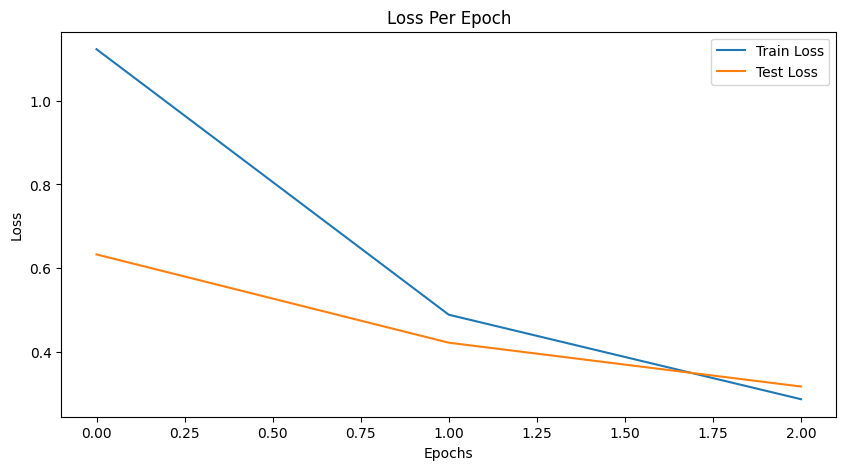

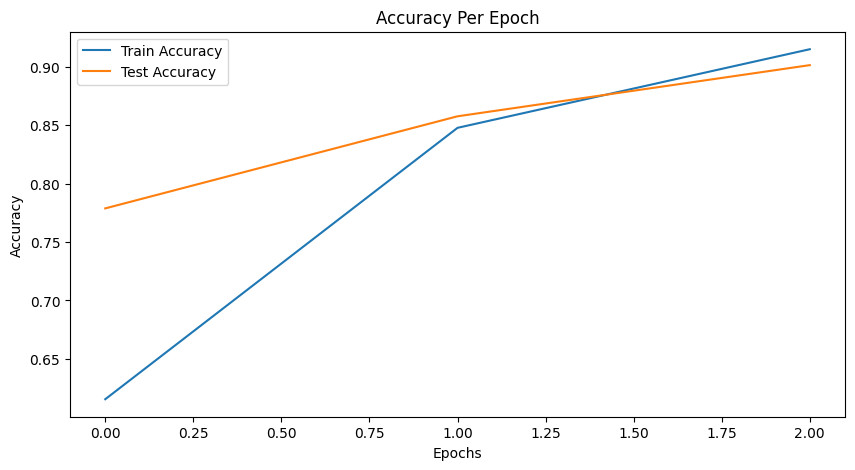

In [41]:
# Plot validation and train loss per epoch

plt.figure(figsize=(10, 5))
plt.plot(train_loss_history, label='Train Loss')
plt.plot(test_loss_history, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Per Epoch')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy_history, label='Train Accuracy')
plt.plot(test_accuracy_history, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Per Epoch')
plt.legend()
plt.show()

<div style="position:relative;padding:.75rem 1.25rem;margin-bottom:1rem;border:1px solid transparent;border-radius:.25rem;background-color:#dae8fc;border-color:#6c8ebf;color:#0c5460">
<b>Step 4: Evaluate BERT after Fine-tuning</b> 
</div>

Evaluate the performance of your model by computing the accuracy of the classification on the test set and plot the confusion matrix.

In [42]:
# Evaluate function

def evaluateModel(model, dataloader, device):
    """Evaluates the model on the test set and returns the accuracy."""
    model.eval()  # Set model to evaluation mode
    all_preds = []
    all_labels = []

    # No gradients during testing
    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Evaluating"):
            # Move data to device
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)  # Attention mask
            labels = batch['labels'].to(device)

            # Forward pass
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            logits = outputs.logits

            # Get predictions (choose the class with the highest score)
            _, preds = torch.max(logits, dim=1)

            # Store predictions and true labels
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calculate accuracy
    accuracy = accuracy_score(all_labels, all_preds)
    return all_preds, all_labels, accuracy

In [43]:
# Predict classes
# Evaluate the model on the test set
preds, true_labels, accuracy = evaluateModel(model, test_dataloader, device)

# Print accuracy
print(f"Test Accuracy: {accuracy:.4f}")

Evaluating:   0%|          | 0/13 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/tmp/ipykernel_23/167630166.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/tmp/ipykernel_23/167630166.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
huggingface/tokenizers: The current process just got forke

Test Accuracy: 0.9012


In [44]:
# Check predicted labels
# Print predicted labels and true labels for the first few examples
for i in range(10):  # Display the first 10 predictions
    print(f"True label: {true_labels[i]}, Predicted label: {preds[i]}")

True label: 2, Predicted label: 2
True label: 2, Predicted label: 2
True label: 1, Predicted label: 1
True label: 3, Predicted label: 3
True label: 4, Predicted label: 4
True label: 2, Predicted label: 2
True label: 1, Predicted label: 1
True label: 1, Predicted label: 1
True label: 4, Predicted label: 3
True label: 3, Predicted label: 3


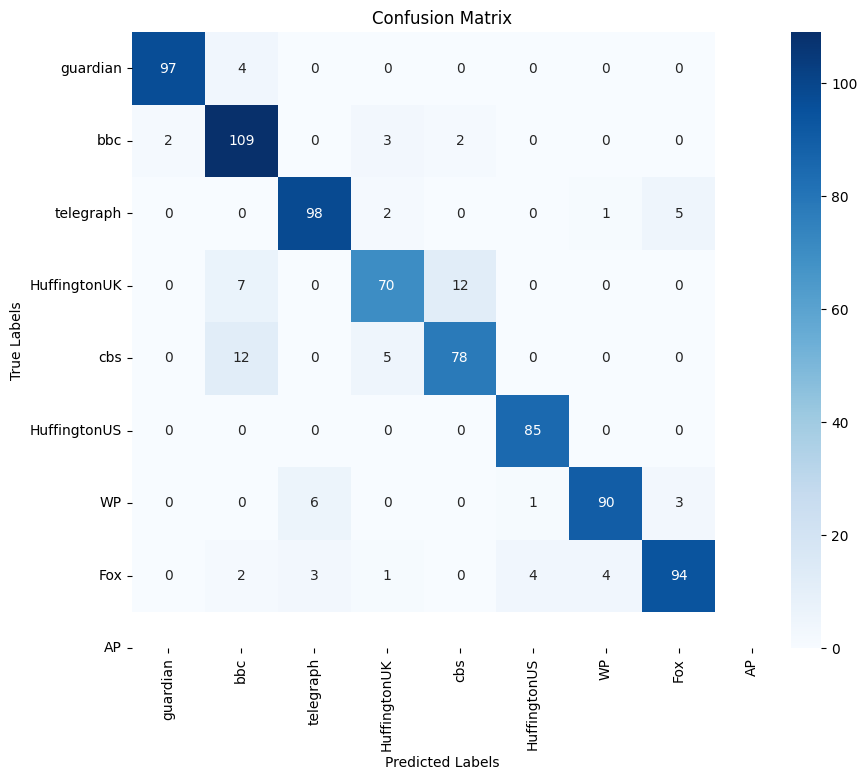

In [45]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
# Generate confusion matrix
cm = confusion_matrix(true_labels, preds)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=all_outlets, yticklabels=all_outlets)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Task 4: Error Analysis

Perform an error analysis of your predictions from the previous task. To achieve this, select a good number of misclassified articles and manually inspect the article content. Can you identify common patterns that may lead the model to misclassify the texts? Discuss your results.

In [46]:
# Error analysis 
# Get the indices of misclassified articles
misclassified_indices = [i for i in range(len(preds)) if preds[i] != true_labels[i]]

# Extract the misclassified articles
misclassified_articles = test_df.iloc[misclassified_indices]
misclassified_articles['predicted_label'] = [preds[i] for i in misclassified_indices]
misclassified_articles['true_label'] = [true_labels[i] for i in misclassified_indices]
misclassified_articles['error_type'] = 'Misclassified'

# Print the error analysis DataFrame
error_analysis_df = misclassified_articles[['article_text', 'true_label', 'predicted_label', 'error_type']]
error_analysis_df.sample(20)

/tmp/ipykernel_23/3388578151.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclassified_articles['predicted_label'] = [preds[i] for i in misclassified_indices]
/tmp/ipykernel_23/3388578151.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclassified_articles['true_label'] = [true_labels[i] for i in misclassified_indices]
/tmp/ipykernel_23/3388578151.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,article_text,true_label,predicted_label,error_type
4054,Fake news reports have been a problem througho...,4,3,Misclassified
6131,Jeremy Corbyn has vowed to make reversing Ther...,6,2,Misclassified
4734,The Las Vegas Review-Journal became the first ...,4,1,Misclassified
4038,Wednesday's newspaper front pages reflect the ...,4,1,Misclassified
4861,"This tweet, from Donald Trump's son Donald Jr....",4,3,Misclassified
3362,"Donald Trump, who appeared on the cover of Pla...",3,1,Misclassified
7117,"Retiring MPs could be handed ""golden goodbye"" ...",7,5,Misclassified
3145,\nMatt Lauer interviews Hillary Clinton − NBC ...,3,4,Misclassified
7828,Presumptive Democratic presidential nominee Hi...,7,1,Misclassified
6342,Labour MPs have denied a newspaper report clai...,6,2,Misclassified


**Your Interpretations:**

•⁠  ⁠From the confusion matrix we can conclude that label 3, HuffingtonUK, was misclassified the most.

•⁠  ⁠Additionally, HuffingtonUK was misclassified 15 times with label 1, bbc, and 20 times with label 4, cbs.